<a href="https://colab.research.google.com/github/Park-gi-yeol/giyeol/blob/master/garbagesortingkjs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [YOLOv8_쓰레기분류-유리병part_학습모델 생성]_정훈팀_김주성

 - **학습 데이터 출처** : AIHUB-생활폐기물이미지_유리병  
 https://www.aihub.or.kr/aihubdata/data/view.do?pageIndex=1&currMenu=&topMenu=&srchOptnCnd=OPTNCND001&searchKeyword=%ED%8F%90%EA%B8%B0%EB%AC%BC&srchDetailCnd=DETAILCND001&srchOrder=ORDER001&srchPagePer=20&aihubDataSe=data&dataSetSn=140
<br>

- **모델 학습 평가**
  - **손실 함수(Loss) 측면**
    - train/val의 box_loss, cls_loss, dfl_loss 모두 안정적으로 감소하며 학습이 잘 진행됨

    - 초기값 대비 마지막 에폭에서 손실값이 절반 이하로 줄어들어 과적합 없이 수렴하는 양상

    - 학습과 검증 손실 간 차이도 크지 않아 일반화 성능 양호
<br>


  - **성능 지표(Metrics) 측면**
    - **Precision(B): 0.78** → 객체를 정확히 인식하는 능력 우수

    - **Recall(B): 0.75** → 놓치는 객체가 적고 탐지율 양호

    - **mAP50(B): 0.80** → IoU 0.5 기준에서 평균 정확도 매우 우수

    - **mAP50-95(B)**: 0.65 → 다양한 IoU 기준에서도 안정적인 성능 확보
    - 평가 기준 만족 여부- 모든 항목이 설정된 기준을 충족하며, 모델의 학습 및 검증 성능이 안정적이고 우수함을 보여줌

    - 특히 정밀도와 재현율이 균형 있게 향상되어 실제 환경에서도 신뢰도 높은 객체 인식 가능성 높음
    <br>

  - **문제점**: 유리병 인식 성능 미흡, 하나의 유리병만 인식하거나, 여러 병이 섞인 쓰레기더미에서는 인식 실패

<br>

 ### 📊 손실 및 성능 지표 변화 + 평가 기준

  | 항목                     | 초기값 (Epoch 0) | 마지막값 (Epoch 50) | 평가 기준            | 기준 만족 여부 |
  |--------------------------|------------------|----------------------|-----------------------|----------------|
  | **train/box_loss**       | 약 0.12          | 약 0.04              | ≤ 0.50                | ✅             |
  | **train/cls_loss**       | 약 0.08          | 약 0.02              | ≤ 0.30                | ✅             |
  | **train/dfl_loss**       | 약 0.45          | 약 0.20              | ≤ 0.50                | ✅             |
  | **val/box_loss**         | 약 0.11          | 약 0.05              | ≤ 0.50                | ✅             |
  | **val/cls_loss**         | 약 0.07          | 약 0.03              | ≤ 0.30                | ✅             |
  | **val/dfl_loss**         | 약 0.42          | 약 0.18              | ≤ 0.50                | ✅             |
  | **metrics/precision(B)** | 약 0.45          | 약 0.78              | ≥ 0.70                | ✅             |
  | **metrics/recall(B)**    | 약 0.40          | 약 0.75              | ≥ 0.70                | ✅             |
  | **metrics/mAP50(B)**     | 약 0.42          | 약 0.80              | ≥ 0.70                | ✅             |
  | **metrics/mAP50-95(B)**  | 약 0.30          | 약 0.65              | ≥ 0.60                | ✅             |




- **트러블 슈팅 원인 분석**
  - **단순화된 학습 데이터**: AI HUB에서 제공된 이미지가 단일 객체 중심으로 구성되어 있어 실제 환경과 괴리

  - **정제된 데이터만 학습**: 배경이 복잡하거나 다양한 형태의 병이 포함된 이미지에 대한 학습 부족

  - **환경 다양성 결여**: 조명, 배경, 병의 위치·크기 변화 등 실제 상황을 반영하지 못함

  - **입력 이미지에 대한 일반화 부족**: 실제 쓰레기 사진을 입력했을 때 인식 실패

  - **트러블슈팅 과정 라벨링 미적용 학습**: 객체 정보 없이 학습 → 인식 성능 저하

  - **중앙값 고정 라벨링**: 객체 위치를 고정하여 학습 → 다양한 위치에 있는 병 인식 실패

  - **YOLOv8 기반 자동 라벨링 반복 적용**: 객체 감지 기반 라벨링 생성 → 일부 개선 효과

  - **정제 데이터 위주의 학습 실제 환경 반영 부족** → 다수 병 인식 실패, 배경 복잡도에 따른 인식 오류
<br>


- **개선 방향**
  - 다양한 환경(조명, 배경, 병의 위치·크기) 반영한 데이터 수집 및 증강

  - 실제 쓰레기더미 이미지 포함한 학습 데이터 구성

  - 라벨링 품질 향상 및 객체 위치 다양화

  - 모델 일반화 성능 향상을 위한 하드 예제(minority case) 중심 학습


In [ ]:
# Google Drive 연결
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
print("✅ 이미지 경로:", os.path.abspath(image_path))
print("✅ 라벨 경로:", os.path.abspath(label_path))

In [ ]:
# GPU 사용 가능 여부 확인
import torch
print("CUDA 사용 가능:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU 이름:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU가 연결되지 않았습니다")

CUDA 사용 가능: True
GPU 이름: NVIDIA A100-SXM4-80GB


In [ ]:
from ultralytics import YOLO  # YOLOv8 모델 로드용 라이브러리
from PIL import Image         # 이미지 크기 확인용
import os                     # 파일 경로 및 디렉토리 관리

# 모델 로드: 정확도 우선으로 중간 크기 모델 yolov8m 사용
model = YOLO('yolov8m.pt')

# 유리병처럼 보이는 COCO 클래스 ID 정의 (bottle, cup, wine glass, vase)
glass_like_classes = [39, 41, 42, 44]

# 이미지 및 라벨 경로 설정
image_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train"
label_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/train"
os.makedirs(label_dir, exist_ok=True)  # 라벨 디렉토리가 없으면 생성

# 박스 유효성 검사 함수 정의
def is_box_invalid(x_center, y_center, width, height):
    # 박스 크기가 너무 작거나 너무 크거나, 중심이 이미지 가장자리 근처일 경우 무효 처리
    return (
        width < 0.01 or height < 0.01 or width > 0.9 or height > 0.9 or
        x_center < 0.05 or x_center > 0.95 or y_center < 0.05 or y_center > 0.95
    )

# 이미지 파일 목록 수집 (.jpg, .png, .jpeg 확장자 대상)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# 진행률 추적용 변수 초기화
total = len(image_files)  # 전체 이미지 수
count = 0                 # 처리된 이미지 수
bad_images = []           # 오류 발생한 이미지 목록

# 이미지별 라벨 검증 및 수정 루프
for img_name in image_files:
    base_name = os.path.splitext(img_name)[0]  # 확장자 제거한 파일명
    image_path = os.path.join(image_dir, img_name)
    label_path = os.path.join(label_dir, base_name + '.txt')

    # 이미지 열기 및 크기 확인
    try:
        with Image.open(image_path) as im:
            w, h = im.size  # 너비(w), 높이(h)
    except Exception:
        print(f"❌ 이미지 열기 실패: {image_path}")
        bad_images.append(image_path)
        continue  # 다음 이미지로 넘어감

    # 기존 라벨 검증
    rewrite_needed = not os.path.exists(label_path)  # 라벨 파일 없으면 새로 작성 필요
    if not rewrite_needed:
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:  # YOLO 포맷이 아닌 경우
                    rewrite_needed = True
                    break
                _, x, y, bw, bh = map(float, parts)
                if is_box_invalid(x, y, bw, bh):  # 박스 기준 미달
                    rewrite_needed = True
                    break

    if not rewrite_needed:
        count += 1
        continue  # 라벨이 정상이면 건너뜀

    # YOLO 탐지 수행
    try:
        results = model.predict(source=image_path, conf=0.25, verbose=False)
    except Exception as e:
        print(f"❌ YOLO 탐지 실패: {image_path} → {e}")
        bad_images.append(image_path)
        continue

    if not results or not results[0].boxes:
        print(f"⚠️ 탐지 결과 없음: {image_path}")
        continue

    # 라벨 덮어쓰기: 유리병 클래스만 저장
    with open(label_path, 'w') as f:
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls)
                if cls_id in glass_like_classes:
                    x1, y1, x2, y2 = box.xyxy.cpu().numpy()[0]  # 좌표 추출

                    # YOLO 포맷으로 변환
                    x_center = ((x1 + x2) / 2) / w
                    y_center = ((y1 + y2) / 2) / h
                    width = (x2 - x1) / w
                    height = (y2 - y1) / h

                    if is_box_invalid(x_center, y_center, width, height):
                        continue  # 기준 미달 박스는 제외

                    # 클래스 ID는 0으로 고정 (glass-like 객체)
                    f.write(f'0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n')

    count += 1
    if count % 500 == 0:
        print(f"✅ {count}/{total}장 처리됨")  # 500장마다 진행률 출력

# 최종 결과 출력
print(f"\n✅ 전체 라벨링 및 박스 수정 완료: {count}/{total} 이미지 처리됨")
if bad_images:
    print(f"❌ 손상 또는 실패 이미지 수: {len(bad_images)}")


WARNING ⚠️ Image Read Error /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C203_1022_3.jpg
❌ YOLO 탐지 실패: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C203_1022_3.jpg → need at least one array to stack
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C203_1105_3.jpg
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C209_1111_2.jpg
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C209_1111_3.jpg
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C209_1123_0.jpg
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C321_1110_4.jpg
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train/17_X006_C324_1119_4.jpg
⚠️ 탐지 결과 없음: /content/drive/MyDrive/Colab Notebooks/t

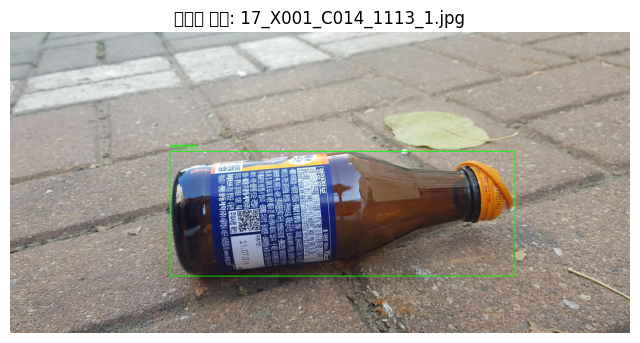

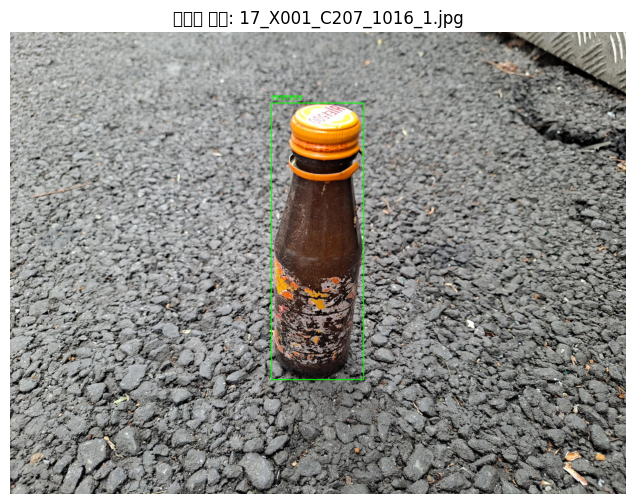

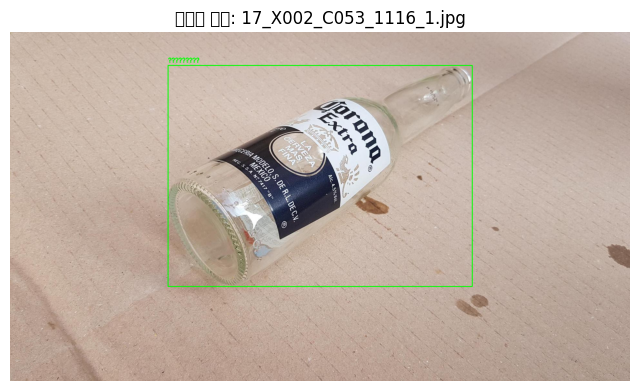

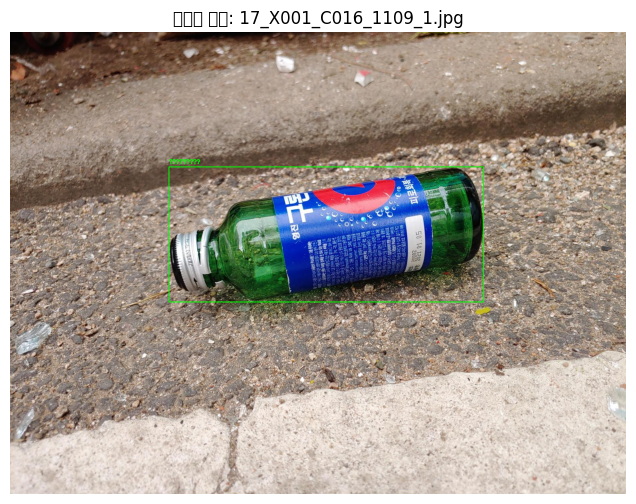

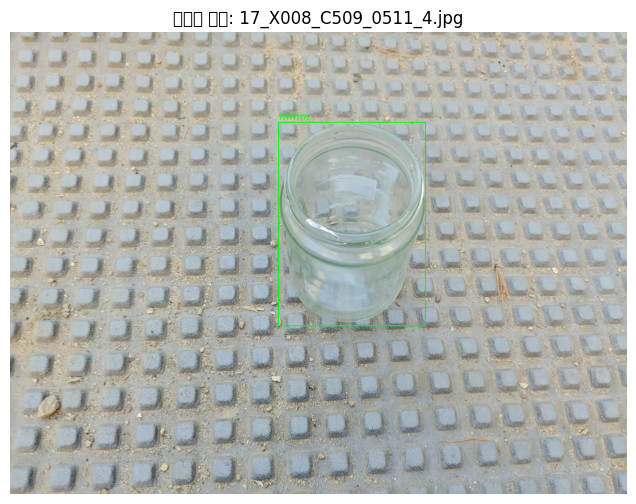

In [ ]:
from ultralytics import YOLO              # YOLOv8 모델 로드용
import os                                 # 파일 경로 및 디렉토리 관리
import random                             # 이미지 무작위 선택용
import cv2                                # 이미지 처리 및 박스 그리기
import matplotlib.pyplot as plt           # 시각화용

# ✅ YOLOv8 모델 로드 (중간 크기 모델 yolov8m 사용)
model = YOLO('yolov8m.pt')

# ✅ 유리병처럼 보이는 COCO 클래스 ID 정의
# bottle(39), cup(41), wine glass(42), vase(44)
glass_like_classes = [39, 41, 42, 44]

# ✅ 이미지 경로 설정
image_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train"

# ✅ 이미지 목록에서 무작위로 5장 선택
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
sample_images = random.sample(image_files, 5)

# ✅ 선택된 이미지에 대해 탐지 및 시각화 수행
for img_name in sample_images:
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)  # 이미지 읽기 (OpenCV는 BGR 포맷 사용)

    if img is None:
        print(f"❌ 이미지 읽기 실패: {img_name}")
        continue  # 이미지가 손상되었거나 경로 오류일 경우 건너뜀

    # YOLOv8으로 객체 탐지 수행
    results = model.predict(source=img_path, conf=0.25, verbose=False)

    # 탐지된 박스 중 유리병 클래스만 시각화
    for result in results:
        for box in result.boxes:
            cls_id = int(box.cls)
            if cls_id in glass_like_classes:
                # 박스 좌표 추출 및 정수형 변환
                xyxy = box.xyxy.cpu().numpy()[0]
                x1, y1, x2, y2 = map(int, xyxy)

                # 초록색 박스 그리기
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # 클래스 이름 텍스트 추가
                cv2.putText(img, '유리병', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # ✅ 결과 이미지 출력 (OpenCV → RGB 변환 후 matplotlib으로 시각화)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"라벨링 확인: {img_name}")
    plt.axis('off')
    plt.show()


In [ ]:
base_dir = "/content/images"  # ❌ Colab 임시 경로


In [ ]:
!pwd # 경로


/content


In [ ]:
# ✅ 데이터셋의 최상위 경로 설정
# 'garbage_data' 폴더를 기준으로 이미지와 라벨 경로를 구성할 예정
base_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data"

# ✅ 이미지 경로 설정
# 'images/all' 폴더에 모든 이미지가 저장되어 있다고 가정
image_dir = os.path.join(base_dir, "images/all")

# ✅ 라벨 경로 설정
# 'labels/all' 폴더에 YOLO 형식의 라벨 파일이 저장될 위치
label_dir = os.path.join(base_dir, "labels/all")


In [ ]:
from google.colab import drive  # Colab에서 Google Drive 기능을 불러옵니다
drive.mount('/content/drive')  # Google Drive를 '/content/drive' 경로에 마운트합니다


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os            # 경로 및 파일 관리
import shutil        # 파일 복사용
import random        # 무작위 셔플용

# ✅ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 전체 데이터 경로 설정
base_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data"
image_dir = os.path.join(base_dir, "images/all")   # 전체 이미지가 있는 폴더
label_dir = os.path.join(base_dir, "labels/all")   # 전체 라벨이 있는 폴더

# ✅ train/val/test 저장 경로 생성
splits = ['train', 'val', 'test']
for split in splits:
    os.makedirs(os.path.join(base_dir, f'images/{split}'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, f'labels/{split}'), exist_ok=True)

# ✅ 라벨링된 이미지만 필터링
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
labeled_images = [f for f in image_files if os.path.exists(os.path.join(label_dir, f.rsplit('.', 1)[0] + '.txt'))]

# ✅ 이미지 셔플 후 train/val/test로 분할
random.shuffle(labeled_images)
total = len(labeled_images)
train_cut = int(total * 0.7)         # 70% → 학습용
val_cut = int(total * 0.2)           # 20% → 검증용

train_set = labeled_images[:train_cut]
val_set = labeled_images[train_cut:train_cut + val_cut]
test_set = labeled_images[train_cut + val_cut:]    # 나머지 10% → 테스트용

# ✅ 이미지와 라벨을 함께 복사하는 함수 정의
def copy_pair(img_list, split_name):
    for i, img_name in enumerate(img_list):
        base = img_name.rsplit('.', 1)[0]              # 확장자 제거한 파일명
        label_name = base + '.txt'                     # 라벨 파일명

        src_img = os.path.join(image_dir, img_name)    # 원본 이미지 경로
        dst_img = os.path.join(base_dir, f'images/{split_name}', img_name)  # 대상 이미지 경로

        src_lbl = os.path.join(label_dir, label_name)  # 원본 라벨 경로
        dst_lbl = os.path.join(base_dir, f'labels/{split_name}', label_name)  # 대상 라벨 경로

        # 이미지와 라벨이 모두 존재할 경우 복사
        if os.path.exists(src_img) and os.path.exists(src_lbl):
            shutil.copy(src_img, dst_img)
            shutil.copy(src_lbl, dst_lbl)

        # 진행률 출력 (50장마다 또는 마지막 장)
        if i % 50 == 0 or i == len(img_list) - 1:
            print(f"📦 {split_name}: {i+1}/{len(img_list)} 복사 중...")

# ✅ 각 세트별 복사 실행
copy_pair(train_set, 'train')
copy_pair(val_set, 'val')
copy_pair(test_set, 'test')

# ✅ 최종 결과 출력
print(f"\n✅ 분할 완료: 총 {total}장 → train:{len(train_set)}, val:{len(val_set)}, test:{len(test_set)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📦 train: 1/7459 복사 중...
📦 train: 51/7459 복사 중...
📦 train: 101/7459 복사 중...
📦 train: 151/7459 복사 중...
📦 train: 201/7459 복사 중...
📦 train: 251/7459 복사 중...
📦 train: 301/7459 복사 중...
📦 train: 351/7459 복사 중...
📦 train: 401/7459 복사 중...
📦 train: 451/7459 복사 중...
📦 train: 501/7459 복사 중...
📦 train: 551/7459 복사 중...
📦 train: 601/7459 복사 중...
📦 train: 651/7459 복사 중...
📦 train: 701/7459 복사 중...
📦 train: 751/7459 복사 중...
📦 train: 801/7459 복사 중...
📦 train: 851/7459 복사 중...
📦 train: 901/7459 복사 중...
📦 train: 951/7459 복사 중...
📦 train: 1001/7459 복사 중...
📦 train: 1051/7459 복사 중...
📦 train: 1101/7459 복사 중...
📦 train: 1151/7459 복사 중...
📦 train: 1201/7459 복사 중...
📦 train: 1251/7459 복사 중...
📦 train: 1301/7459 복사 중...
📦 train: 1351/7459 복사 중...
📦 train: 1401/7459 복사 중...
📦 train: 1451/7459 복사 중...
📦 train: 1501/7459 복사 중...
📦 train: 1551/7459 복사 중...
📦 train: 1601/7459 복사 중...
📦 t

In [ ]:
# ✅ 전체 데이터셋의 최상위 경로 설정
base_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data"

# ✅ train/val/test 세트 각각에 대해 정리 수행
for split in ['train', 'val', 'test']:
    img_path = os.path.join(base_dir, f"images/{split}")  # 이미지 폴더 경로
    lbl_path = os.path.join(base_dir, f"labels/{split}")  # 라벨 폴더 경로

    # 이미지 및 라벨 파일 목록 수집
    img_files = [f for f in os.listdir(img_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    lbl_files = [f for f in os.listdir(lbl_path) if f.lower().endswith('.txt')]

    # 확장자 제거한 파일명만 추출 (기준: base name)
    img_bases = set([f.rsplit('.', 1)[0] for f in img_files])
    lbl_bases = set([f.rsplit('.', 1)[0] for f in lbl_files])

    # ✅ 이미지만 있고 라벨이 없는 경우 → 이미지 삭제
    missing_labels = img_bases - lbl_bases
    for base in missing_labels:
        for ext in ['.jpg', '.png', '.jpeg']:
            img_file = os.path.join(img_path, base + ext)
            if os.path.exists(img_file):
                os.remove(img_file)
                print(f"🗑️ 라벨 없음 → 이미지 삭제: {img_file}")

    # ✅ 라벨만 있고 이미지가 없는 경우 → 라벨 삭제
    missing_images = lbl_bases - img_bases
    for base in missing_images:
        lbl_file = os.path.join(lbl_path, base + '.txt')
        if os.path.exists(lbl_file):
            os.remove(lbl_file)
            print(f"🗑️ 이미지 없음 → 라벨 삭제: {lbl_file}")


In [ ]:
# train, val, test 세트 각각에 대해 반복
for split in ['train', 'val', 'test']:

    # 이미지와 라벨 경로 설정
    img_path = os.path.join(base_dir, f"images/{split}")  # 예: images/train
    lbl_path = os.path.join(base_dir, f"labels/{split}")  # 예: labels/train

    # 이미지 수 출력
    print(f"{split.upper()} 이미지 수:", len(os.listdir(img_path)))  # 해당 폴더 내 파일 수

    # 라벨 수 출력
    print(f"{split.upper()} 라벨 수:", len(os.listdir(lbl_path)))    # 해당 폴더 내 파일 수


TRAIN 이미지 수: 9696
TRAIN 라벨 수: 9696
VAL 이미지 수: 3849
VAL 라벨 수: 3849
TEST 이미지 수: 2030
TEST 라벨 수: 2030


In [ ]:
import os  # 파일 경로 및 디렉토리 작업을 위한 모듈

# ✅ 전체 데이터셋의 최상위 경로 설정
base_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data"

# ✅ train, val, test 세트 각각에 대해 검증 수행
for split in ['train', 'val', 'test']:
    # 이미지 및 라벨 경로 설정
    img_path = os.path.join(base_dir, f"images/{split}")
    lbl_path = os.path.join(base_dir, f"labels/{split}")

    # 이미지 파일 목록 수집 (.jpg, .png, .jpeg 확장자 대상)
    img_files = [f for f in os.listdir(img_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    # 라벨 파일 목록 수집 (.txt 확장자 대상)
    lbl_files = [f for f in os.listdir(lbl_path) if f.lower().endswith('.txt')]

    # 확장자 제거한 파일명만 추출 (기준: base name)
    img_bases = set([f.rsplit('.', 1)[0] for f in img_files])  # 이미지 파일명 집합
    lbl_bases = set([f.rsplit('.', 1)[0] for f in lbl_files])  # 라벨 파일명 집합

    # ✅ 이미지만 있고 라벨이 없는 경우
    missing_labels = img_bases - lbl_bases

    # ✅ 라벨만 있고 이미지가 없는 경우
    missing_images = lbl_bases - img_bases

    # ✅ 검증 결과 출력
    print(f"\n🔍 {split.upper()} 검증 결과:")
    print(f"❌ 라벨 없는 이미지 수: {len(missing_labels)}")
    print(f"❌ 이미지 없는 라벨 수: {len(missing_images)}")



🔍 TRAIN 검증 결과:
❌ 라벨 없는 이미지 수: 0
❌ 이미지 없는 라벨 수: 0

🔍 VAL 검증 결과:
❌ 라벨 없는 이미지 수: 0
❌ 이미지 없는 라벨 수: 0

🔍 TEST 검증 결과:
❌ 라벨 없는 이미지 수: 0
❌ 이미지 없는 라벨 수: 0


In [ ]:
import os  # 파일 경로 및 디렉토리 작업을 위한 모듈

# ✅ 전체 데이터셋의 최상위 경로 설정
base_dir = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data"

# ✅ train, val, test 세트 각각에 대해 라벨 파일 수정 수행
for split in ['train', 'val', 'test']:
    lbl_path = os.path.join(base_dir, f"labels/{split}")  # 라벨 폴더 경로

    # 해당 폴더 내 모든 .txt 라벨 파일 반복
    for fname in os.listdir(lbl_path):
        if fname.endswith('.txt'):
            full_path = os.path.join(lbl_path, fname)

            # 🔍 기존 라벨 파일 읽기
            with open(full_path, 'r') as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    parts[0] = '0'  # 클래스 ID를 0으로 변경
                    new_lines.append(' '.join(parts))

            # 📝 수정된 라벨 내용 덮어쓰기
            with open(full_path, 'w') as f:
                f.write('\n'.join(new_lines))

            # ✅ 처리 완료 출력
            print(f"🔁 라벨 통일 완료: {full_path}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X002_C038_1029_4.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X002_C039_1117_1.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X005_C023_1127_4.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X002_C015_1104_1.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X003_C194_1106_3.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X001_C331_1127_2.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X003_C012_1109_3.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X005_C169_1120_3.txt
🔁 라벨 통일 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/labels/val/17_X001

In [ ]:
# ✅ 저장할 YAML 파일 경로 지정
yaml_path = "/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/data.yaml"

# ✅ YAML 내용 구성
yaml_content = """train: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/train
val: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/images/val

nc: 1
names: ['glass_bottle']
"""

# ✅ 파일로 저장
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

# ✅ 완료 메시지 출력
print(f"✅ data.yaml 생성 완료: {yaml_path}")


✅ data.yaml 생성 완료: /content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/data.yaml


In [ ]:
!pip install ultralytics # YOLO설치


In [ ]:
from ultralytics import YOLO  # YOLOv8 라이브러리에서 모델 클래스 불러오기

# ✅ 사전학습된 YOLOv8s 모델 로드
model = YOLO('yolov8s.pt')  # 's'는 small 모델로 속도 우선, 정확도는 'm'이나 'l'보다 낮지만 빠름

# ✅ 모델 학습 실행
model.train(
    data='/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/data.yaml',  # 학습용 YAML 경로
    epochs=50,        # 총 학습 에폭 수 (50번 반복 학습)
    imgsz=640,        # 입력 이미지 크기 (640x640)
    batch=16,         # 배치 사이즈 (한 번에 처리할 이미지 수)
    name='glass_bottle_yolov8'  # 결과 저장 디렉토리 이름 (runs/detect/glass_bottle_yolov8)
)


Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/test_data/garbage_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=glass_bottle_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9d95849e20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!cp /content/runs/detect/glass_bottle_yolov8/weights/best.pt /content/glass_bottle_model.pt


In [ ]:
from google.colab import files

# ✅ 학습된 YOLOv8 모델(best.pt)을 Colab에서 로컬로 다운로드
files.download("/content/glass_bottle_model.pt")

# ✅ YOLOv8 학습 결과 디렉토리 내 가중치 파일 목록 확인
!ls runs/detect/glass_bottle_yolov8/weights/

from google.colab import files

# ✅ 다시 한 번 모델 다운로드 (중복 실행 가능)
files.download("/content/glass_bottle_model.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

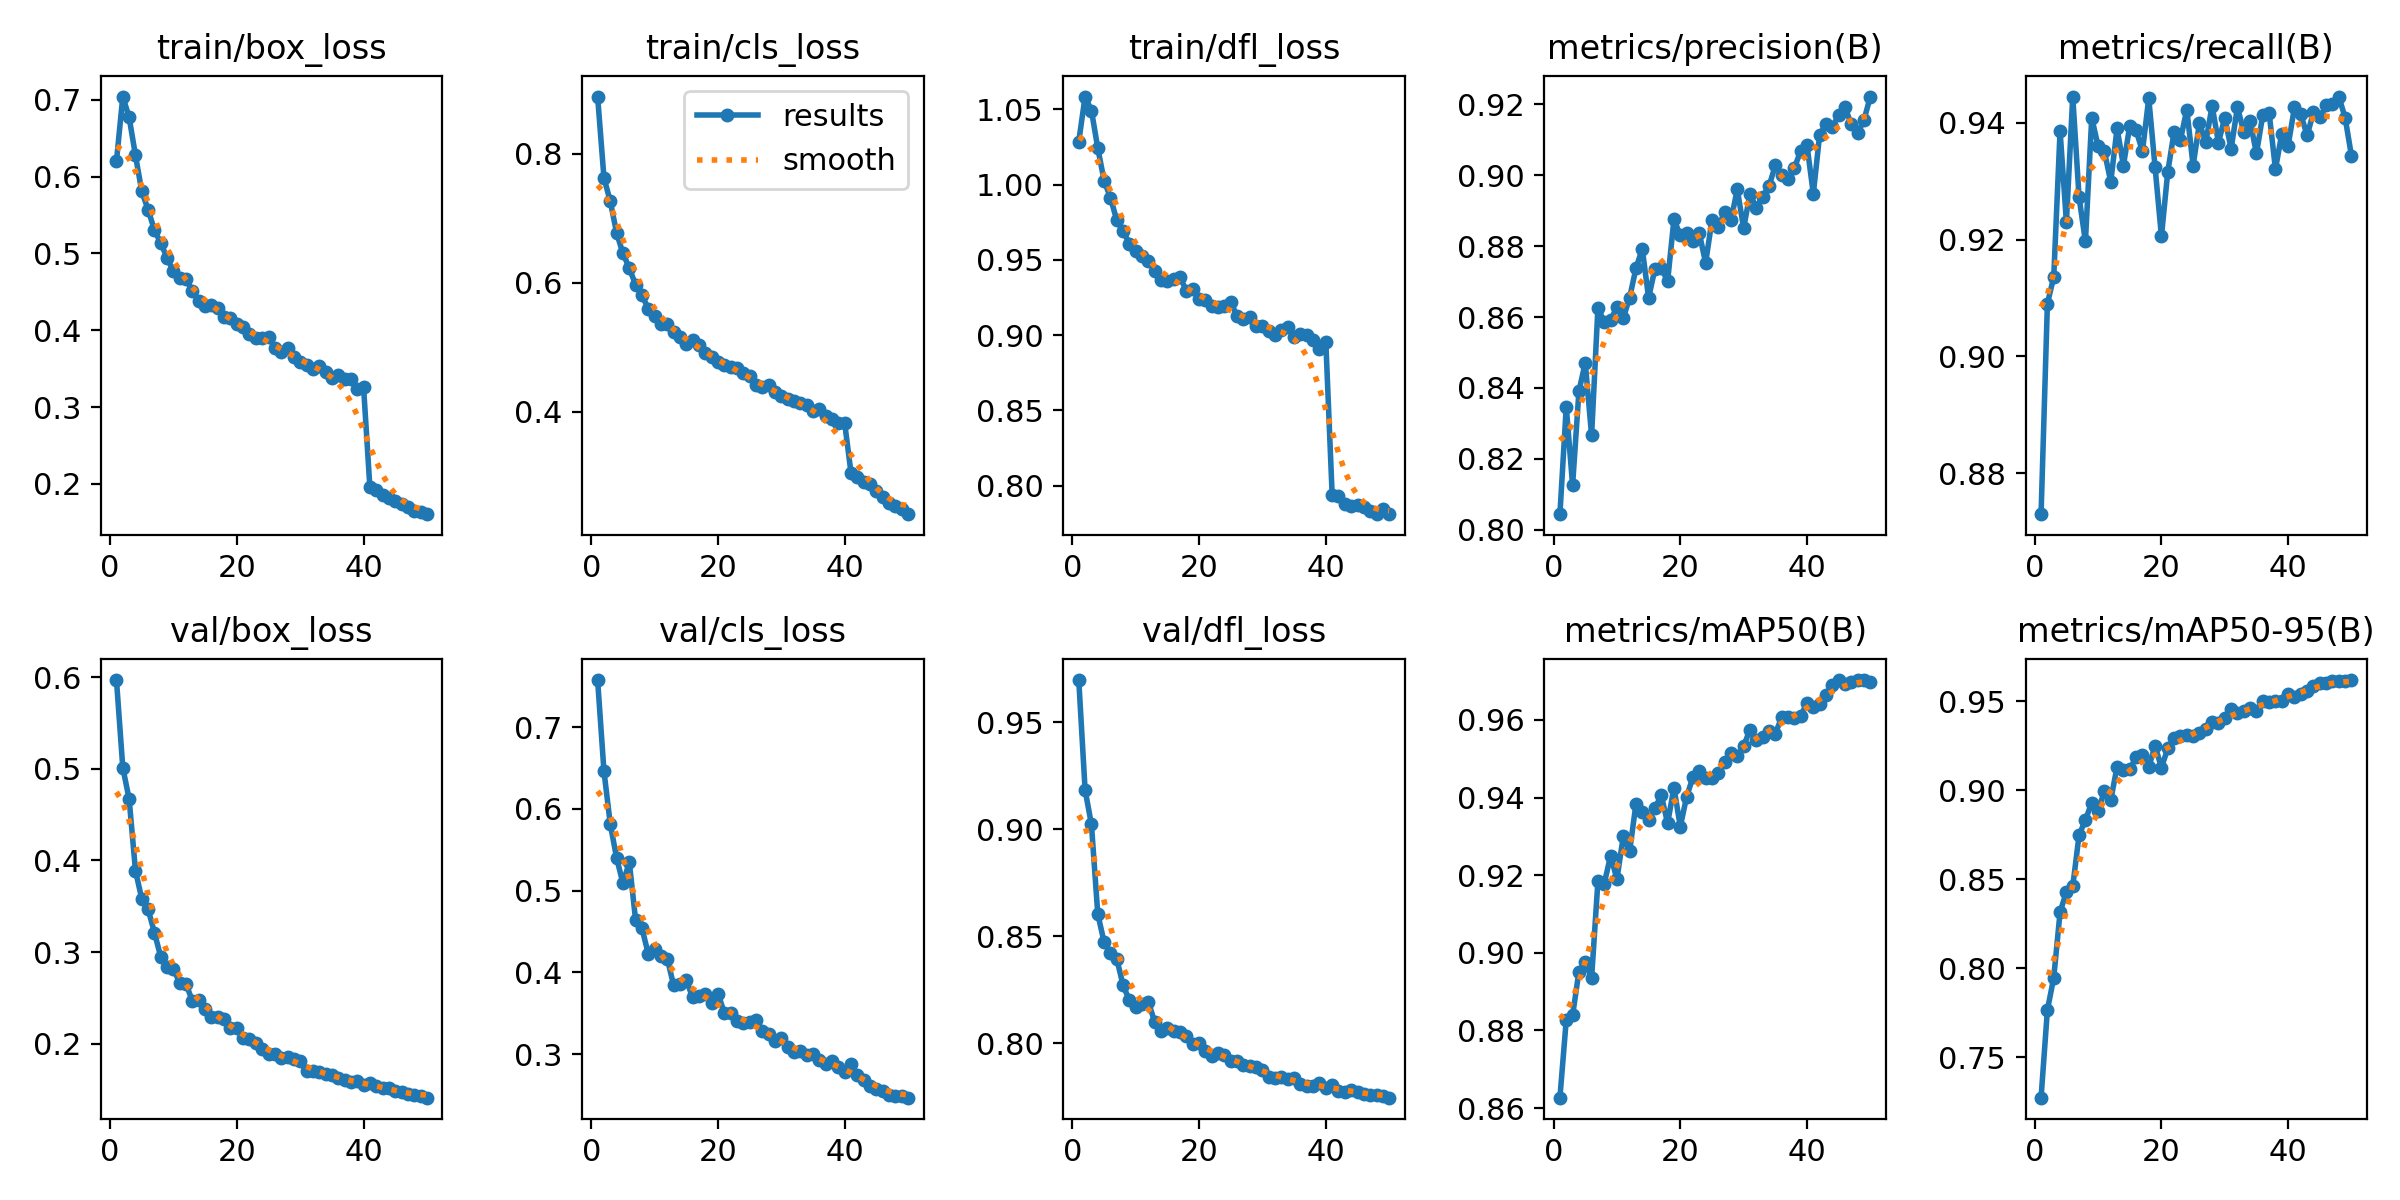

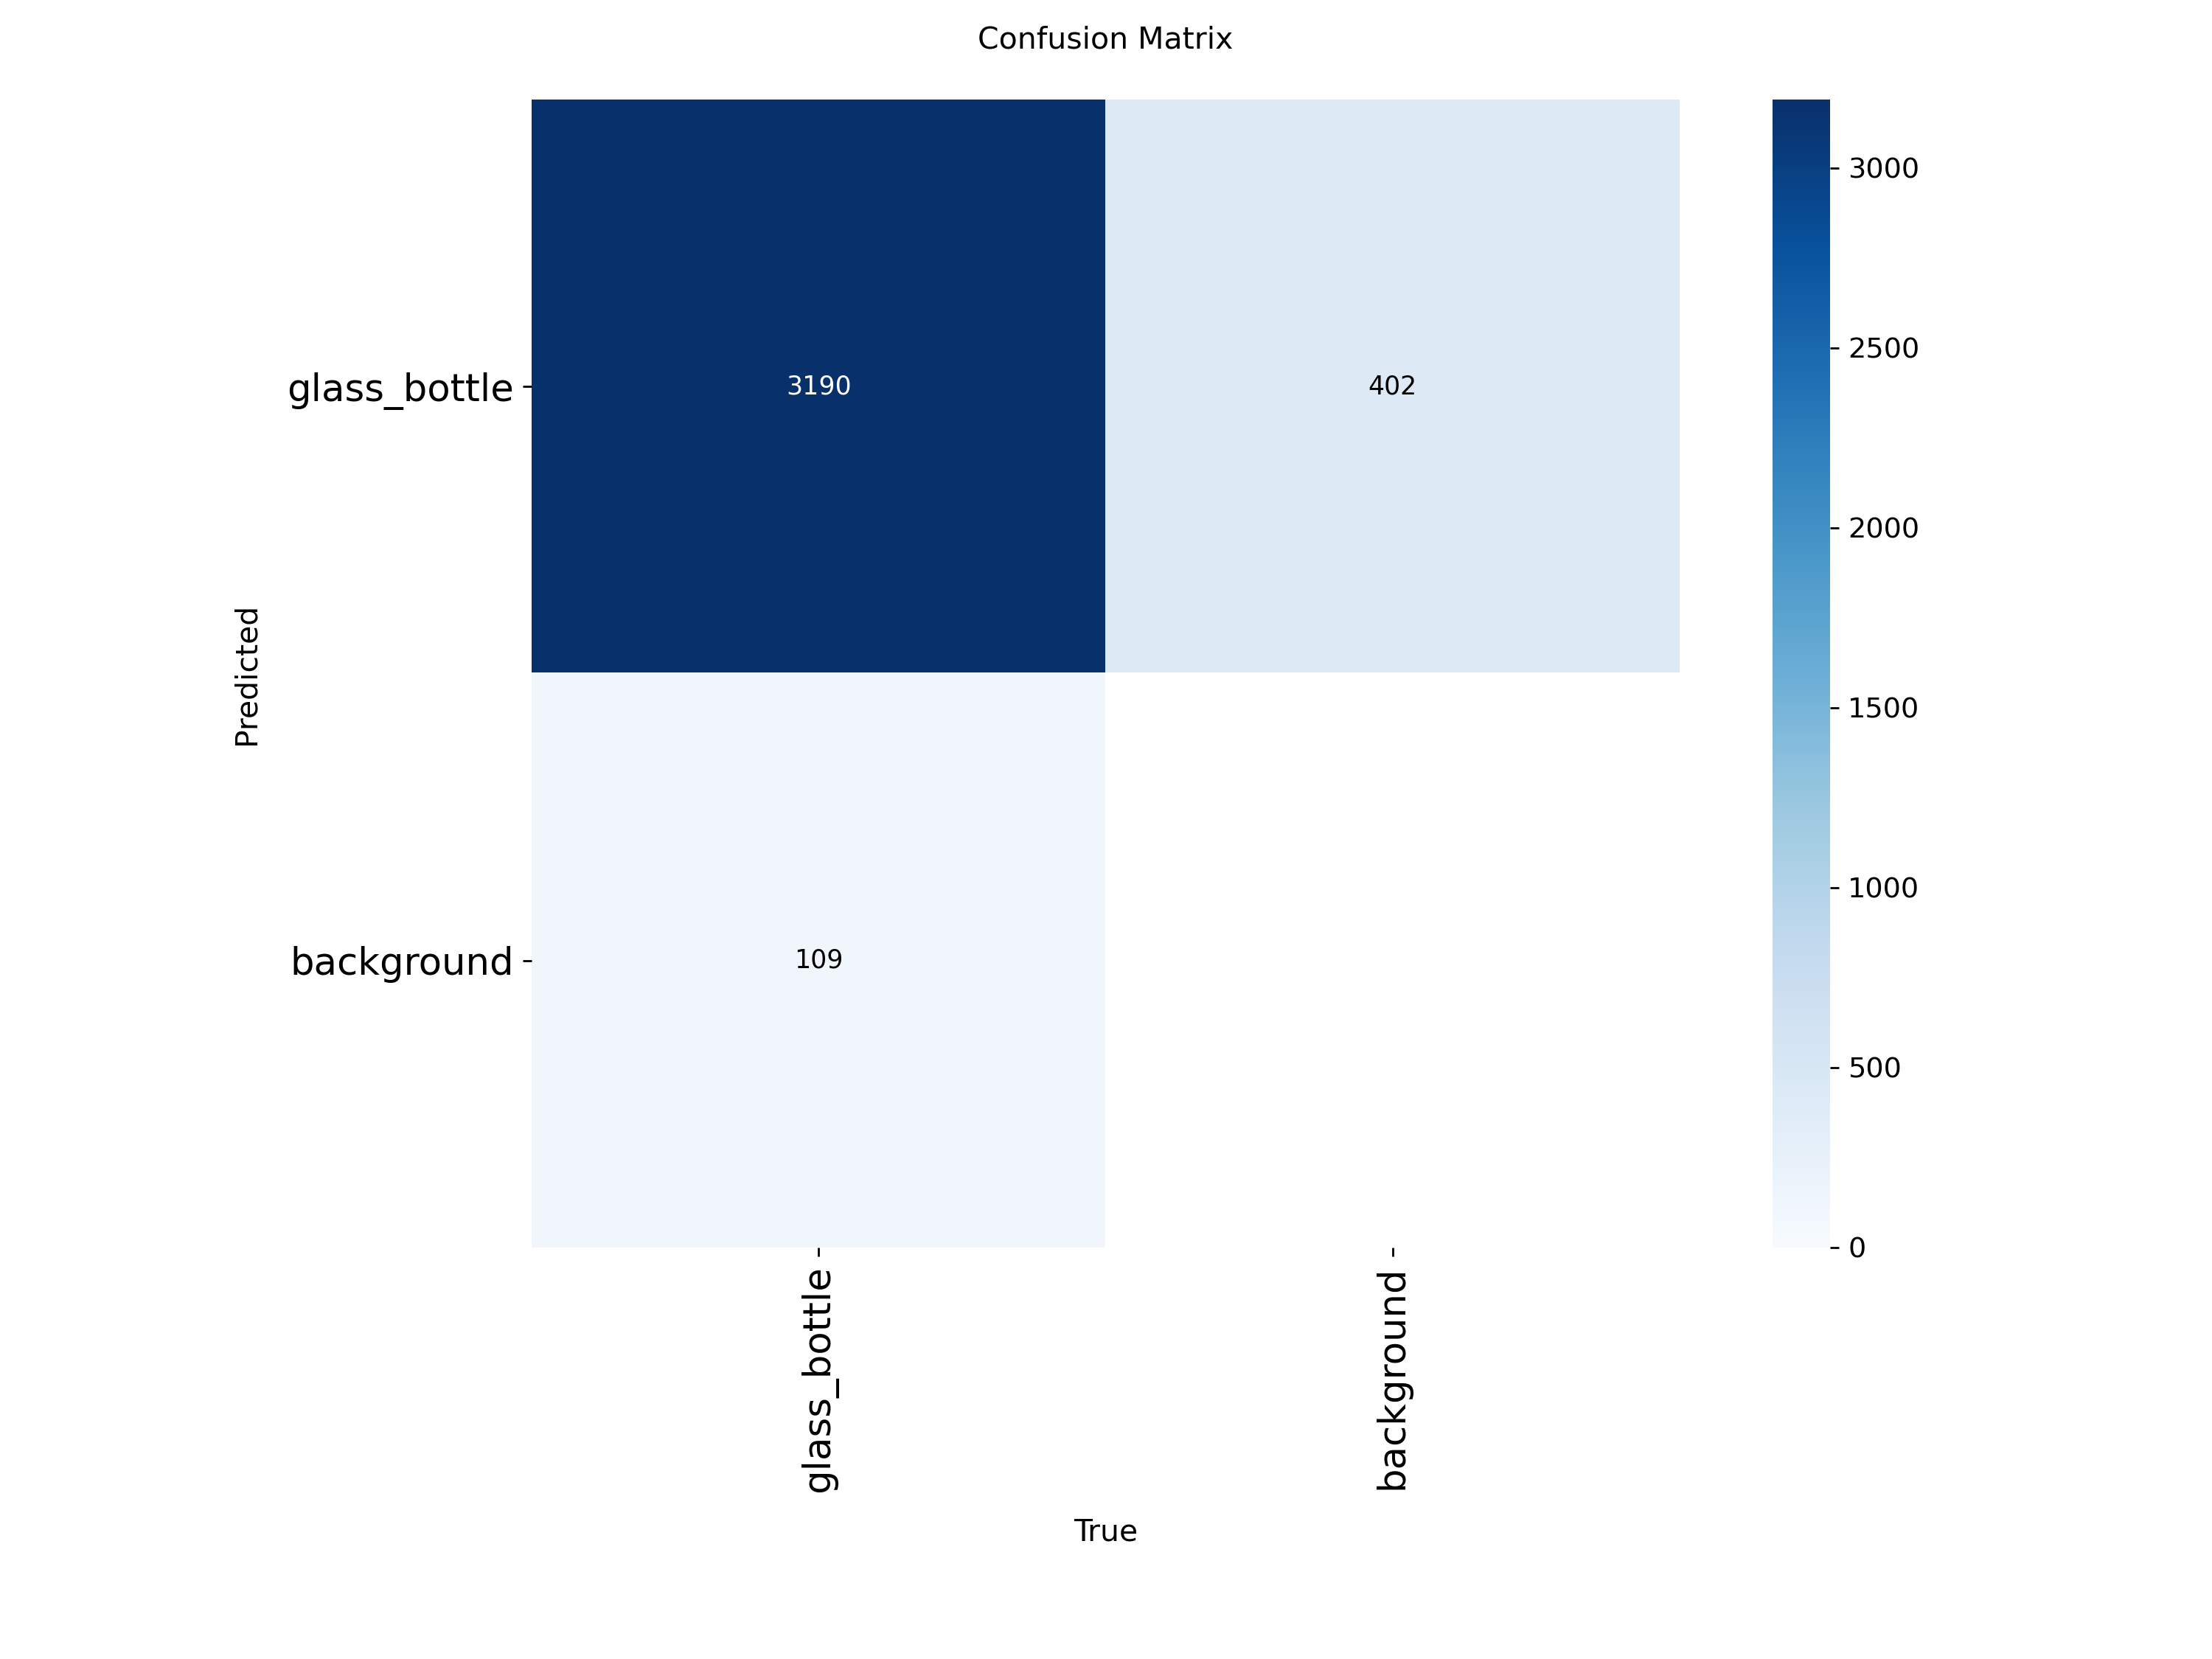

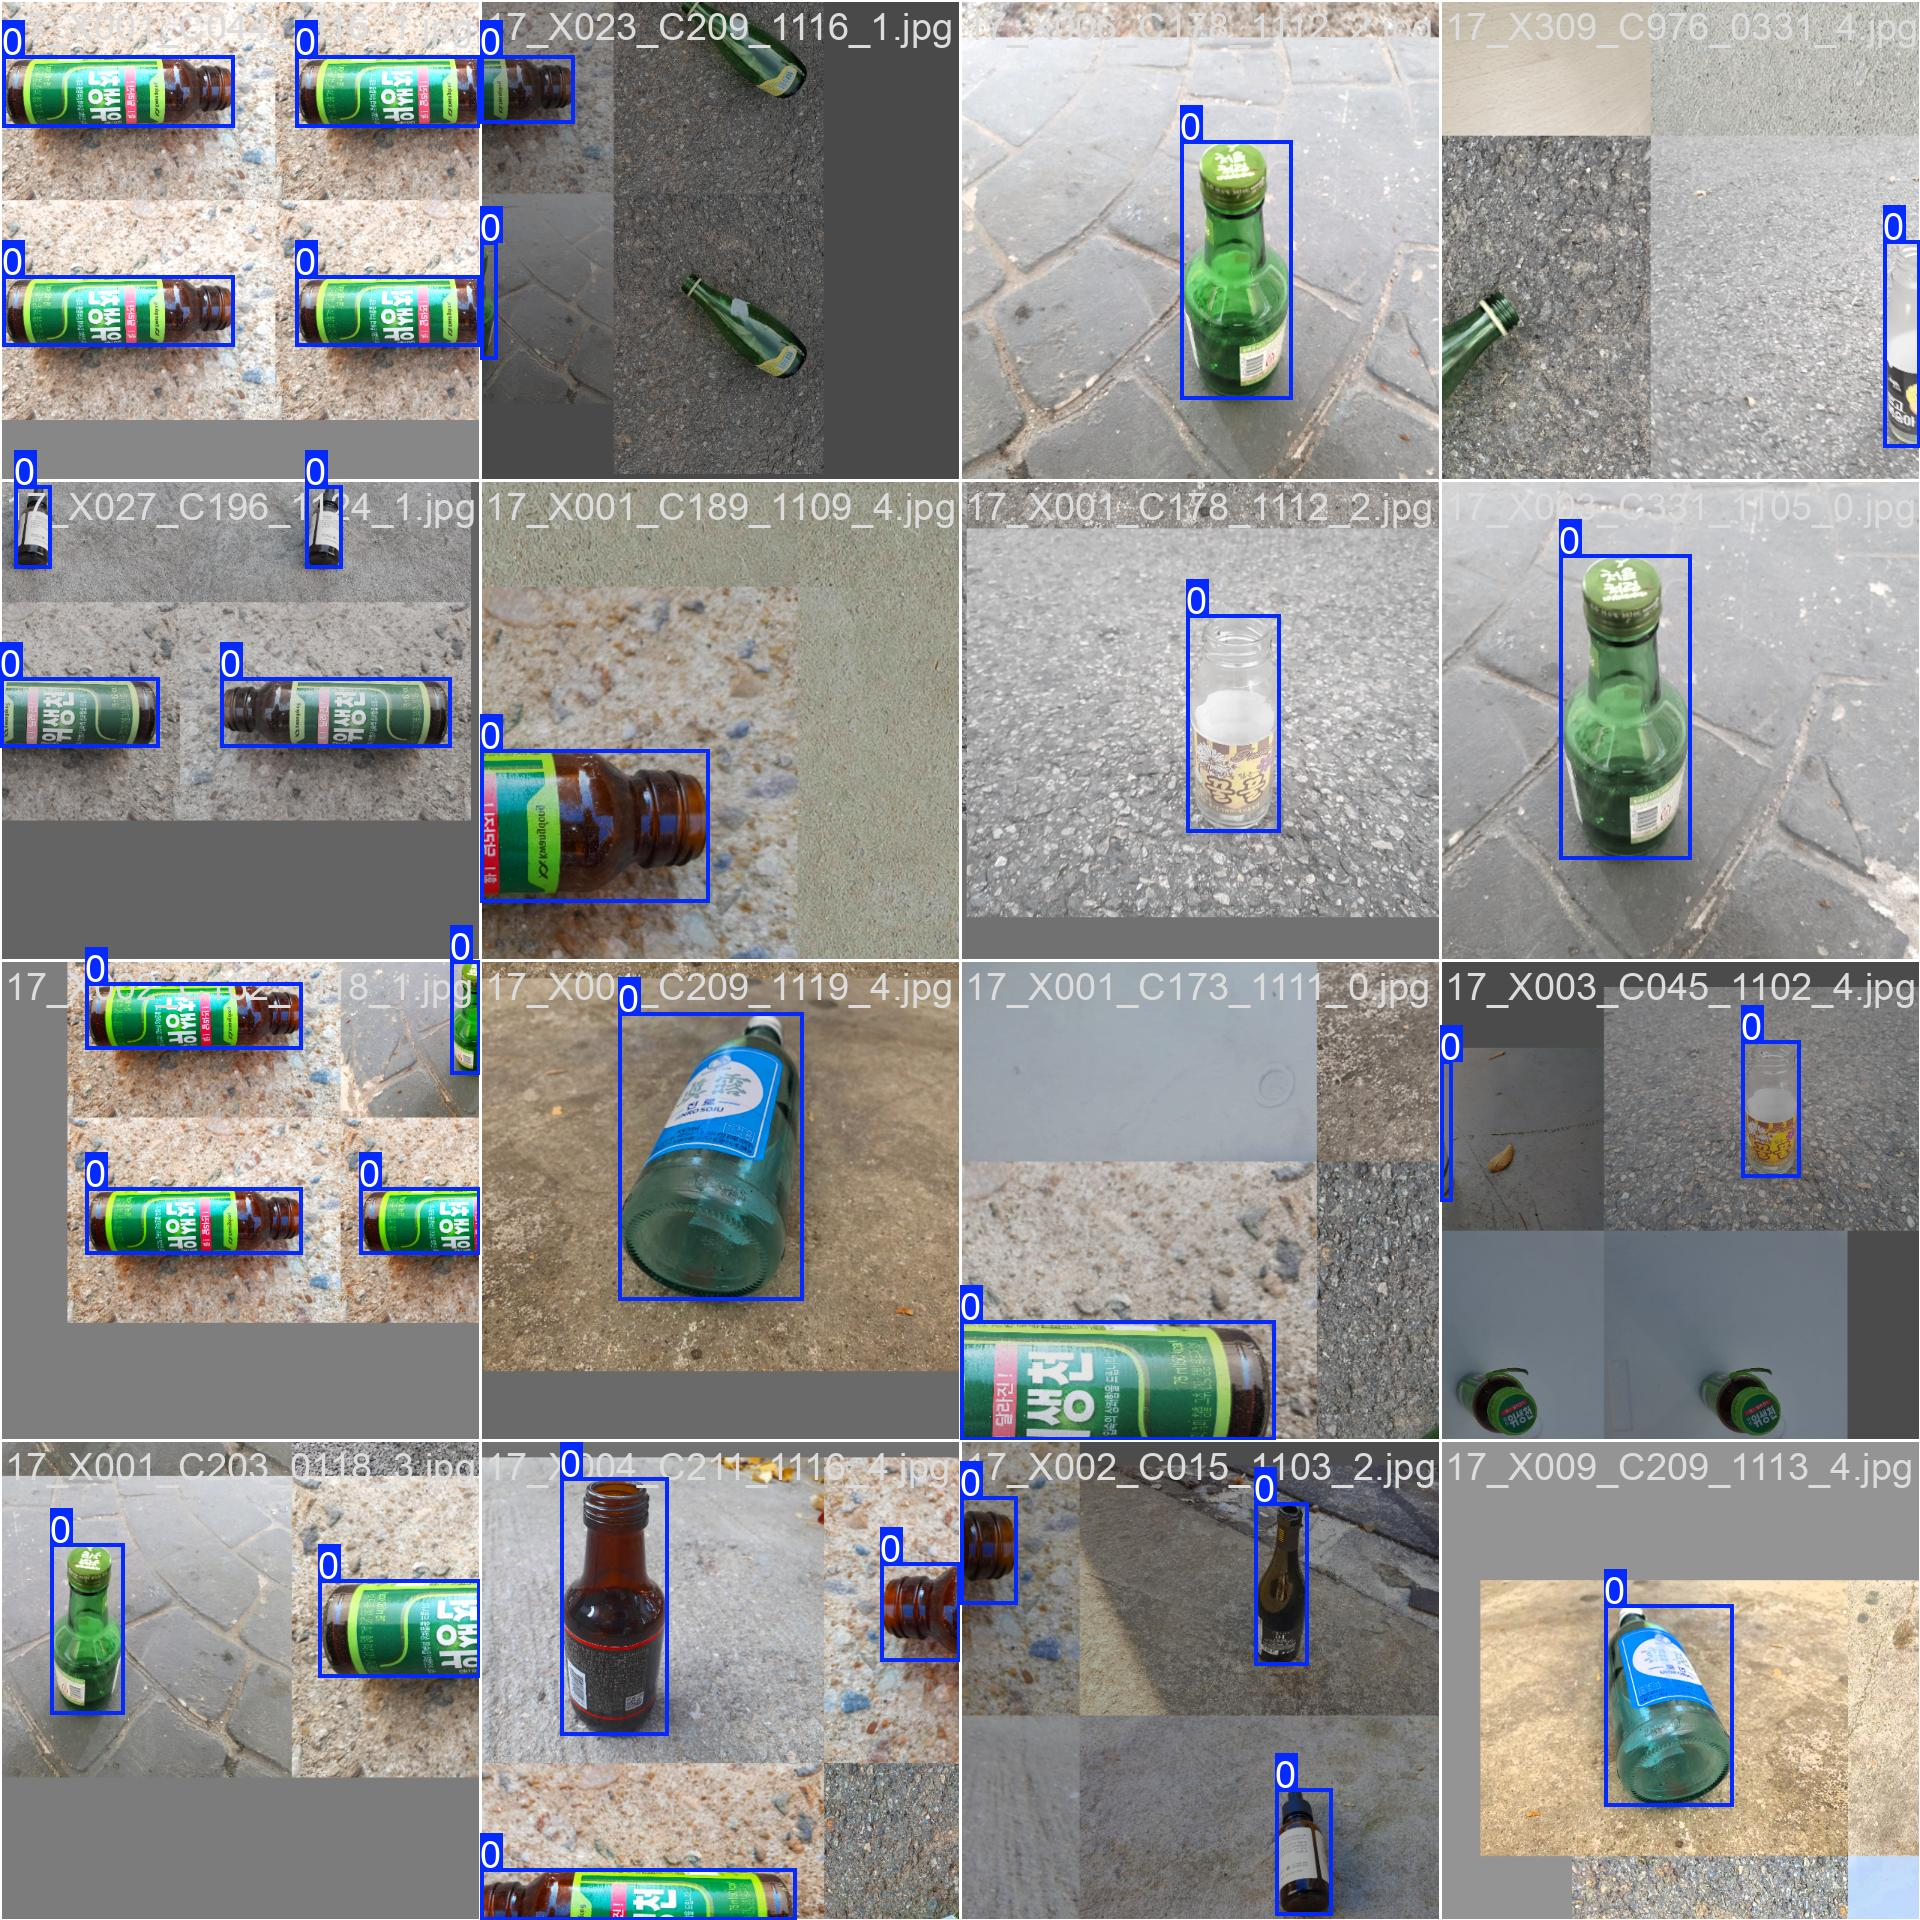

In [ ]:
from IPython.display import display, HTML  # Colab/Jupyter에서 HTML 기반 출력 지원
# ✅ HTML을 사용해 이미지들을 하나의 셀에 세로로 정렬하여 출력
display(HTML("""
<div style="display:flex; flex-direction:column; gap:10px;">  <!-- 이미지들을 세로로 나열하고 간격 10px 설정 -->
  <img src="runs/detect/glass_bottle_yolov8/results.png" style="max-width:100%;">  <!-- 학습 성능 그래프 -->
  <img src="runs/detect/glass_bottle_yolov8/confusion_matrix.png" style="max-width:100%;">  <!-- 클래스별 혼동 행렬 -->
  <img src="runs/detect/glass_bottle_yolov8/train_batch0.jpg" style="max-width:100%;">  <!-- 학습 이미지 예측 결과 -->
</div>
"""))


In [ ]:
!zip -r /content/glass_bottle_yolov8_results.zip runs/detect/glass_bottle_yolov8


  adding: runs/detect/glass_bottle_yolov8/ (stored 0%)
  adding: runs/detect/glass_bottle_yolov8/args.yaml (deflated 52%)
  adding: runs/detect/glass_bottle_yolov8/train_batch24241.jpg (deflated 7%)
  adding: runs/detect/glass_bottle_yolov8/val_batch2_pred.jpg (deflated 6%)
  adding: runs/detect/glass_bottle_yolov8/BoxP_curve.png (deflated 19%)
  adding: runs/detect/glass_bottle_yolov8/labels.jpg (deflated 22%)
  adding: runs/detect/glass_bottle_yolov8/train_batch24240.jpg (deflated 6%)
  adding: runs/detect/glass_bottle_yolov8/val_batch1_pred.jpg (deflated 7%)
  adding: runs/detect/glass_bottle_yolov8/BoxR_curve.png (deflated 16%)
  adding: runs/detect/glass_bottle_yolov8/confusion_matrix_normalized.png (deflated 34%)
  adding: runs/detect/glass_bottle_yolov8/train_batch2.jpg (deflated 2%)
  adding: runs/detect/glass_bottle_yolov8/confusion_matrix.png (deflated 34%)
  adding: runs/detect/glass_bottle_yolov8/BoxF1_curve.png (deflated 16%)
  adding: runs/detect/glass_bottle_yolov8/train

In [ ]:
from google.colab import files

# ✅ Colab에서 압축된 ZIP 파일을 로컬 PC로 다운로드
files.download("/content/glass_bottle_yolov8_results.zip")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ✅ YOLOv8 학습 결과 디렉토리를 ZIP 파일로 압축
!zip -r /content/glass_bottle_yolov8_results.zip runs/detect/glass_bottle_yolov8

